![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

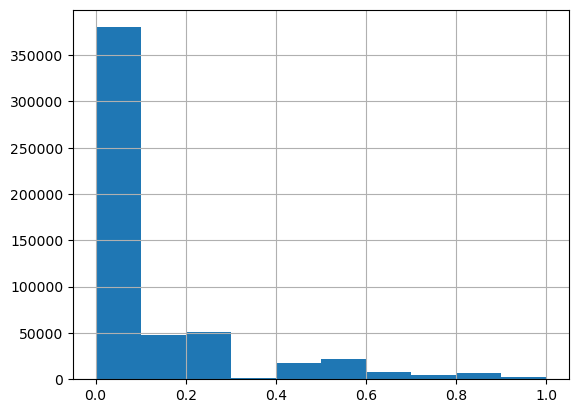

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.shape

(362779,)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 1
vectorizer = CountVectorizer(lowercase=False)

In [11]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [12]:
X_test_vectorized = vectorizer.transform(X_test)

In [13]:
####Modelo
modelo = LinearRegression()
modelo.fit(X_train_vectorized, y_train)

LinearRegression()

In [14]:
y_pred = modelo.predict(X_test_vectorized)
mse = mean_squared_error(y_test, y_pred)
print("MSE de regresión:", mse)

MSE de regresión: 0.04790639111769472


Teniendo en cuenta que solo se realizó la tokenización con limpieza de mayúsculas, y a partir de esto se realizó una regresión lineal para predecir la probabilidad de que un comentario sea tóxico, el MSE de la regresión es 0.0479 indica que, en promedio, las predicciones del modelo están cerca de los valores reales con un error cuadrático medio de 0.0479. Esto sugiere que el modelo tiene un rendimiento bastante bueno en la tarea de predecir la probabilidad de que un comentario sea tóxico.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 2
vectorizerB = CountVectorizer(lowercase=False, ngram_range=(1, 3))
X_train_vectorizedB = vectorizerB.fit_transform(X_train)
X_test_vectorizedB = vectorizerB.transform(X_test)

In [16]:
modeloB = LinearRegression()
modeloB.fit(X_train_vectorizedB, y_train)

y_pred = modeloB.predict(X_test_vectorizedB)


mse_3g = mean_squared_error(y_test, y_pred)
print("MSE de regresión con trigramas:", mse_3g)

MSE de random forest con trigramas: 0.04541239663527883


In [17]:
print("MSE de regresión con trigramas:", mse_3g)

MSE de regresión con trigramas: 0.04541239663527883


Teniendo en cuenta que solo se realizó la tokenización con limpieza de mayúsculas y se preprocesaron los comentarios como trigramas, y a partir de esto se realizó una regresión lineal para predecir la probabilidad de que un comentario sea tóxico, el MSE de esta regresión es 0.0454 indica que, en promedio, las predicciones del modelo están cerca de los valores reales con un error cuadrático medio de 0.0454.

Considerando el modelo realizado en el punto anterior, el emplear trigramas en el preprocesamiento en los comentarios hace que el modelo tenga un mejor rendimiento en la tarea de predecir la probabilidad de toxicidad en los comentarios. Esto indica que la inclusión de trigramas en el preprocesamiento probablemente haya sido beneficiosa para la calidad de las predicciones del modelo.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### TfidfVectorizer
TfidfVectorizer consiste en una técnica de vectorización de texto empleada en los análisis de procesamiento de lenguaje natural (NLP), en donde por medio de una fórmula estadística se transforman los textos en vectores de acuerdo a la relevancia que tiene la palabra. 

Lo anterior se realiza por medio del algoritmo TF-IDF (Term frequency Inverse document frequency), el cual se basa en el modelo de todas las palabras para crear una matriz que contiene la información sobre las palabras menos relevantes y más relevantes del documento.

**Funcionamiento**
* Término de frecuencia (TF): Mide la frecuencia de una palabra (w) en el documento (d).

$$TF(w,d)= \frac{\text{Ocurrencia de w en d}}{\text{Número total de palabras en d}}$$

* Frecuencia Inversa de Documento (IDF): Calcula la rareza de un término en un Corpus D. Así, las palabras mas frecuentes como "la, el, los" no tienen tanta importancia.

$$IDF(w,D)= ln(\frac{\text{Número total de documentos en Corpus D}}{\text{Número de documentos que contienen w}})$$

* Frecuencia de Término-Frecuencia Inversa de Documento (TF-IDF): es el producto de la frecuencia del término y la frecuencia inversa del documento. Se da más importancia a la palabra que es rara en el corpus y común en un documento.

$$TF-IDF(w,d,D)=  TF(w,d) * IDF(w,D)$$

Finalmente, cada documento se representa como un vector donde cada dimensión corresponde a un término único en el corpus y el valor de esa dimensión es el TF-IDF del término en el documento. Por ejemplo, si un documento contiene muchas veces la palabra “gato”, las posibilidades aumentan para que el documento sea relevante para la búsqueda “gato”, debido a que el término es poco frecuente dentro de la muestra en global de documentos.

**Ventajas**
* Reduce la importancia de términos comunes: reduce la importancia de los términos que son comunes en muchos documentos, lo que puede mejorar la capacidad del modelo para distinguir entre documentos.
* Considera la importancia relativa de los términos: TfidfVectorizer pondera los términos en función de su importancia relativa en el documento y en el corpus.
* Es simple de calcular, computacionalmente barato y es un punto de partida simple.

**Desventajas**
* Ignora el contexto: TfidfVectorizer trata cada palabra de forma independiente y puede ignorar el contexto o la relación entre las palabras.
* Ignora el orden de las palabras y, por lo tanto, los sustantivos compuestos
* Necesita saber o estimar el número total de documentos para poder entregar resultados significativos. 

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [18]:
# Celda 4
vectorizerC = TfidfVectorizer()
X_train_vectorizedC = vectorizerC.fit_transform(X_train)
X_test_vectorizedC = vectorizerC.transform(X_test)

In [19]:
modeloC=LinearRegression()
modeloC.fit(X_train_vectorizedC, y_train)

y_predC = modeloC.predict(X_test_vectorizedC)
mse_TFIDF = mean_squared_error(y_test, y_predC)
print("MSE de Regresion con TfidfVectorizer:", mse_TFIDF)

MSE de Regresion con TfidfVectorizer: 0.02799877450213873


Teniendo en cuenta que solo se realizó el preprocesamiento de los comentarios con TfidfVectorize, y a partir de esto se realizó una regresión lineal para predecir la probabilidad de que un comentario sea tóxico, el MSE para este caso es de aproximadamente 0.028 indica que las predicciones del modelo están, en promedio, muy cerca de los valores reales, lo que sugiere que el modelo tiene un buen rendimiento en la tarea de predecir la probabilidad de toxicidad en los comentarios utilizando TfidfVectorizer.

De esta manera, se obtuvo un MSE más bajo en comparación con los demás modelos anteriores que utilizaban CountVectorizer sugiere que TfidfVectorizer capturó de manera más efectiva la información relevante en el texto para predecir la probabilidad de toxicidad de los comentarios. Esto puede deberse a la capacidad de TfidfVectorizer para ponderar la importancia relativa de los términos en función de su frecuencia en el documento y en el corpus más amplio.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

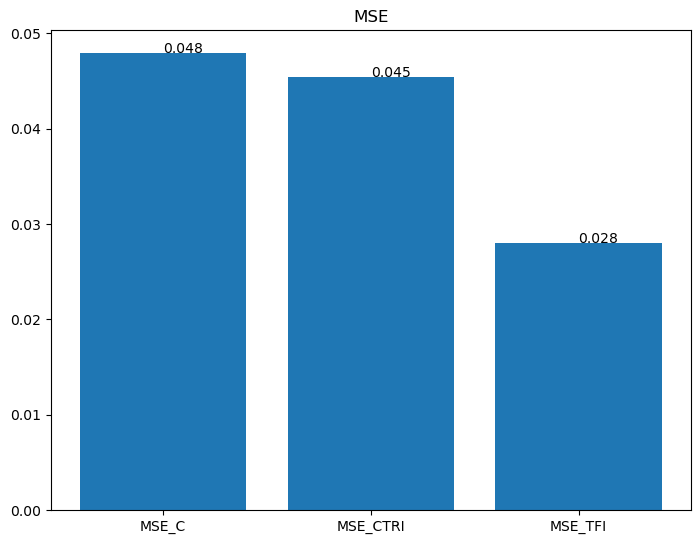

In [23]:
# Celda 5
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("MSE")
ejeX = ['MSE_C', 'MSE_CTRI','MSE_TFI']
ejeY = [mse,mse_3g,mse_TFIDF]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

Finalmente al comparar el MSE de los tres modelos realizados, se tiene que el modelo que se realizó con TfidfVectorize tiene el menor MSE, así el MSE para este caso es de aproximadamente 0.028 que indica que las predicciones del modelo están, en promedio, muy cerca de los valores reales, lo que sugiere que el modelo tiene un buen rendimiento en la tarea de predecir la probabilidad de toxicidad en los comentarios utilizando TfidfVectorizer.